In [ ]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [ ]:

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

le = LabelEncoder()
data['booking_status'] = le.fit_transform(data['booking_status'])

features = ['lead_time', 'number_of_adults', 'number_of_children', 'room_type', 'average_price']
X = data[features]

X = pd.get_dummies(X, drop_first=True)

y = data['booking_status']


In [ ]:
data = pd.read_csv('first inten project.csv')
data.head()
train = pd.read_csv('first inten project.csv')


In [ ]:
print(data.columns)

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# booking_status: Cancelled = 1, Not_Cancelled = 0
data['booking_status'] = le.fit_transform(data['booking_status'])

# repeated: Yes/No → 1/0
data['repeated'] = le.fit_transform(data['repeated'])


In [ ]:
categorical_cols = ['room_type', 'type_of_meal', 'market_segment_type']

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = [
    'lead_time',
    'number_of_adults',
    'number_of_children',
    'number_of_weekend_nights',
    'number_of_week_nights',
    'special_requests',
    'average_price'
]

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


In [ ]:
y = data['booking_status']

X = data.drop('booking_status', axis=1)


In [ ]:
train.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [ ]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')


In [ ]:
le = LabelEncoder()
data['booking_status'] = le.fit_transform(data['booking_status'])


In [ ]:
features = [
    'lead_time',
    'number_of_adults',
    'number_of_children',
    'average_price',
    'room_type',
    'number_of_weekend_nights',
    'number_of_week_nights',
    'special_requests',
    'type_of_meal',
    'market_segment_type',
    'repeated'
]

X = data[features]
X = pd.get_dummies(X, drop_first=True)


In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
y = data['booking_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

print("✅ Accuracy(%):", accuracy_score(y_test, y_pred)*100)
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy(%): 79.9779523218961

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.61      0.67      2402
           1       0.82      0.90      0.86      4855

    accuracy                           0.80      7257
   macro avg       0.78      0.75      0.76      7257
weighted avg       0.79      0.80      0.79      7257


📊 Confusion Matrix:
 [[1458  944]
 [ 509 4346]]


In [ ]:
#polynomial
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
features = [
    'lead_time',
    'number_of_adults',
    'number_of_children',
    'number_of_weekend_nights',
    'number_of_week_nights',
    'special_requests'
]

X = data[features]
y = data['average_price']


In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" MSE :", mse)
print(" R²_score :", r2)


 MSE : 885.3535588141358
 R²_score : 0.27046858538340357


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

le = LabelEncoder()
data['booking_status'] = le.fit_transform(data['booking_status'])  # Cancelled=1, Not_Cancelled=0

features = [
    'lead_time',
    'number_of_adults',
    'number_of_children',
    'number_of_weekend_nights',
    'number_of_week_nights',
    'special_requests',
    'average_price',
    'room_type',
    'market_segment_type',
    'type_of_meal',
    'repeated'
]

X = data[features]

X = pd.get_dummies(X, drop_first=True)

y = data['booking_status']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.7853107344632768

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.70      2402
           1       0.87      0.79      0.83      4855

    accuracy                           0.79      7257
   macro avg       0.76      0.78      0.77      7257
weighted avg       0.80      0.79      0.79      7257


📊 Confusion Matrix:
 [[1846  556]
 [1002 3853]]


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_numeric = X.select_dtypes(include=[np.number])

X_const = add_constant(X_numeric)

vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif)


                     Feature        VIF
0                      const  29.992430
1           number_of_adults   1.204458
2         number_of_children   1.161440
3   number_of_weekend_nights   1.052020
4      number_of_week_nights   1.069289
5          car_parking_space   1.032361
6                  lead_time   1.311427
7                   repeated   1.552312
8                        p-c   1.329850
9                    p-not-c   1.591760
10             average_price   1.370147
11          special_requests   1.184133
12            booking_status   1.404548


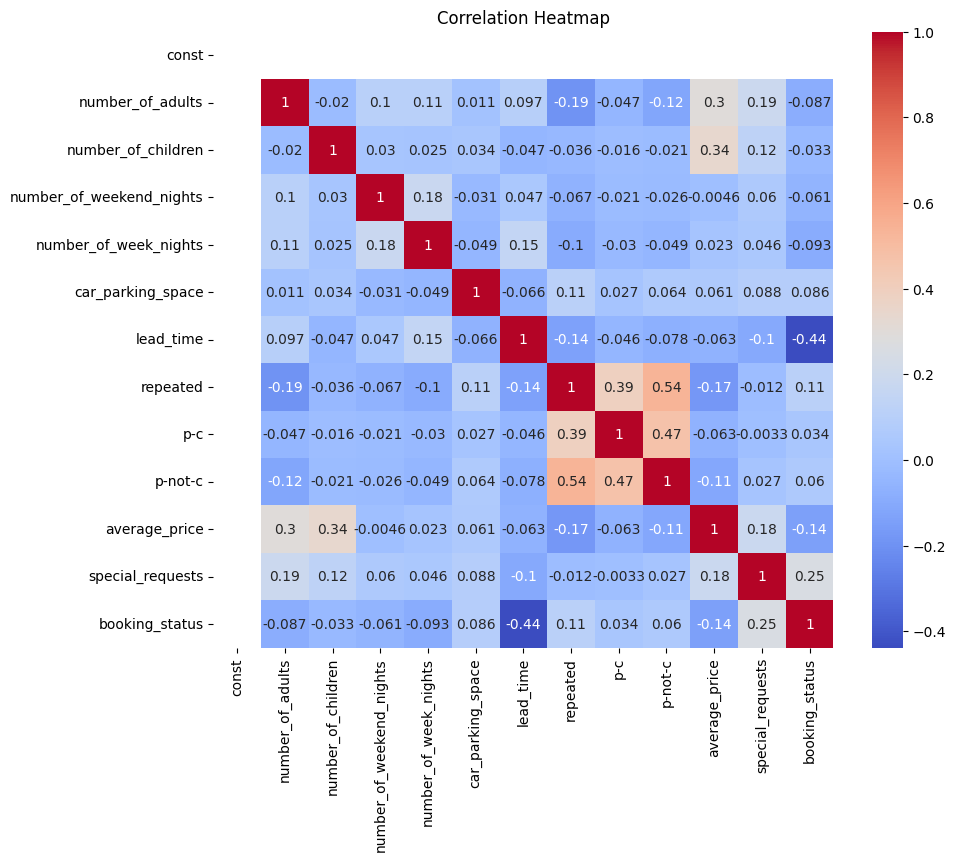

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(X_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
